# Introduction to classification models with TF

Tipes of classification

* Binary
* Multiclass
* Multilabel

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.5.0


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#Make 1000 examples

n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise = 0.03,random_state=42)


In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


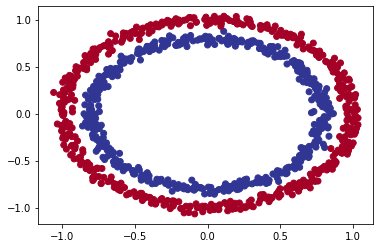

In [6]:
import matplotlib.pyplot as plt

plt.scatter(circles['X0'],circles['X1'],c = circles['label'],cmap = plt.cm.RdYlBu)

## Input and Output shapes

In [7]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
# Number of samples
len(X),len(y)

(1000, 1000)

## Steps in modelling

In [9]:
#Set random seed
tf.random.set_seed(42)
# 1. Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile model

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

#3. Fit the model

model_1.fit(X,y,epochs = 200,verbose = 0)

In [10]:
# Ideally there should be a train/test split of the data
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Step things up and add an extra layer

In [11]:
#Set random seed
tf.random.set_seed(42)
# 1. Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile model

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

#3. Fit the model

model_2.fit(X,y,epochs = 200,verbose = 0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

## Improving our model

How to improve in each step 

1. Create a model -> Add more layers or hidden units
2. Compile a model -> Change optimization function or tune its hyperparameters
3. Fitting a model -> Increase number of epochs

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189085006714, 0.5090000033378601]

## Creating a function to visualize the predictions



In [15]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


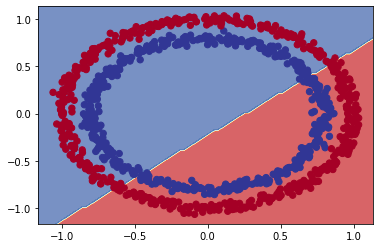

In [16]:
plot_decision_boundary(model_3,X,y)



In [17]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y = x+100
# Split our regression data intro train and test

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our mode to the regression data

model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


We compiled our model_3 for a binary classification model,let's change it to work on a regression

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0045 - mae: 47.0045

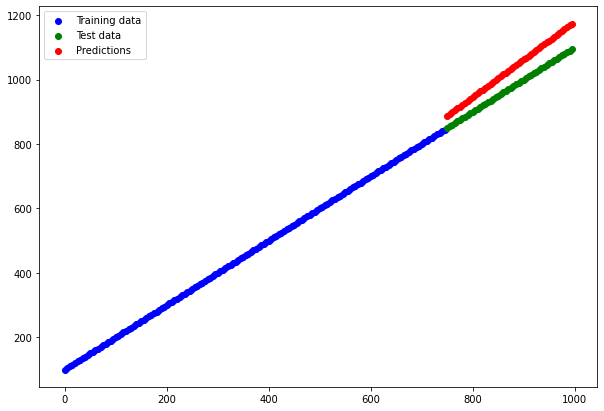

In [19]:
# Make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

# Plot predictions against the real values

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label = 'Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label = 'Test data')
plt.scatter(X_reg_test,y_reg_preds,c='r',label = 'Predictions')
plt.legend()
plt.show()

The missing piece: Non-Linearity

In [20]:
# Set the random seed

tf.random.set_seed(42)

#1. Create the model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#2.Compile our model

model_4.compile(loss = 'binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr = 0.001),
                metrics=["accuracy"])

#3. Fit the model

history = model_4.fit(X,y,epochs=100)

c:\users\jvspa\documents\github\tensorflow-deep-learning\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270

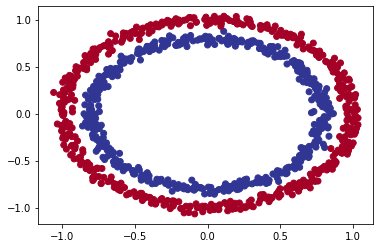

In [21]:
# Check out our data

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

doing binary classification


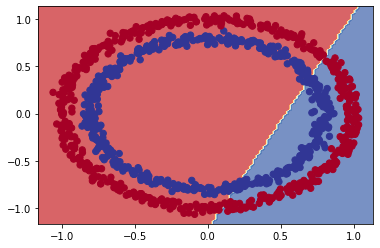

In [22]:
#Check the decision plot_decision_boundary
plot_decision_boundary(model_4,X,y)

Building the firt model with a non-linear activation function

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
# Compile

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit

history = model_5.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1183 - accuracy: 0.4270

Time to replicate the multi-layer from TF playgroung

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
# Compile

model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit

history = model_6.fit(X,y,epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms

In [25]:
#Evaluate model

model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


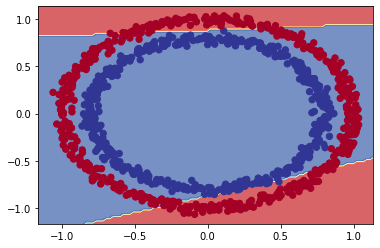

In [26]:
# How do our model predictions look

plot_decision_boundary(model_6,X,y)

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# Compile

model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

#Fit

history = model_7.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5300

In [28]:
#Evaluate model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948005199432373, 0.9909999966621399]

Visualizing the activation functions

doing binary classification


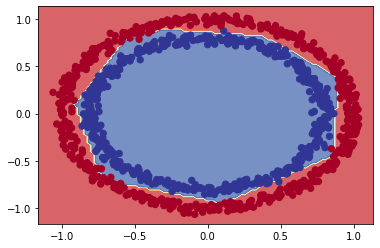

In [29]:
# Visualize predictions

plot_decision_boundary(model_7,X,y)

In [30]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10),dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

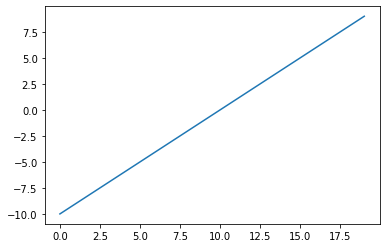

In [31]:
# Visualizing A

plt.plot(A)

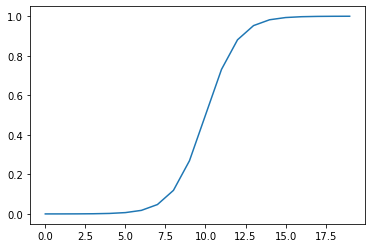

In [32]:
#Applying sigmoid to A

plt.plot(tf.keras.activations.sigmoid(A))

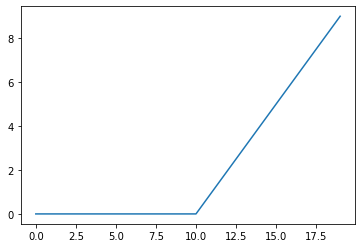

In [33]:
#Applying ReLu to A

plt.plot(tf.keras.activations.relu(A))

Evaluating and improving our classification model

In [34]:
# Creating a training and test set

len(X)


1000

In [35]:
# Split into train and test sets

X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [36]:
# Recreating the model to fit on the training data and evaluate on the test set

tf.random.set_seed(42)
#1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#2. Compile model
model_8.compile(loss = 'binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
#3. Fit model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775

In [37]:
#4. Evaluate on test data

model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849122524261, 1.0]

doing binary classification
doing binary classification


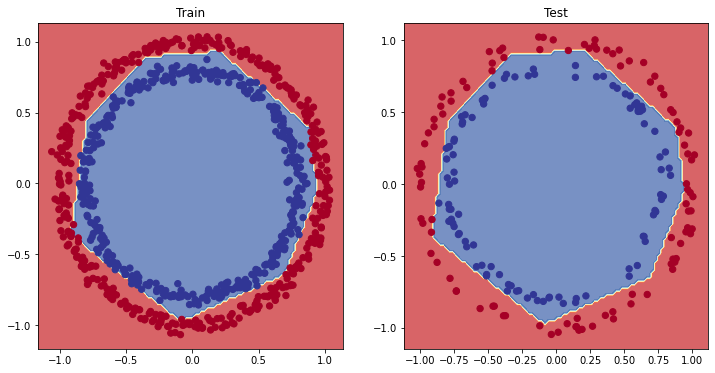

In [38]:
# Plot the decision boundaries for train and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

## Plot the loss curves

In [39]:
# Convert history into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Loss Curves (Model 8)')

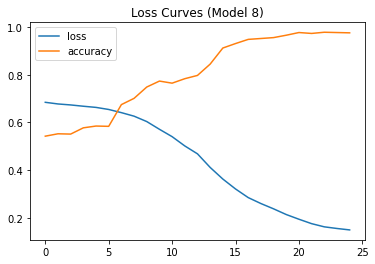

In [41]:
# Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title('Loss Curves (Model 8)')

## Finding the best learning rate

To find the ideal learning rate we're going to use:

* Learning rate callback
    * Extra piece of functionality you can add to the model while it trains
* Another model
* Modified loss curves plot

In [44]:
# Set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Creating learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975

<AxesSubplot:xlabel='epochs'>

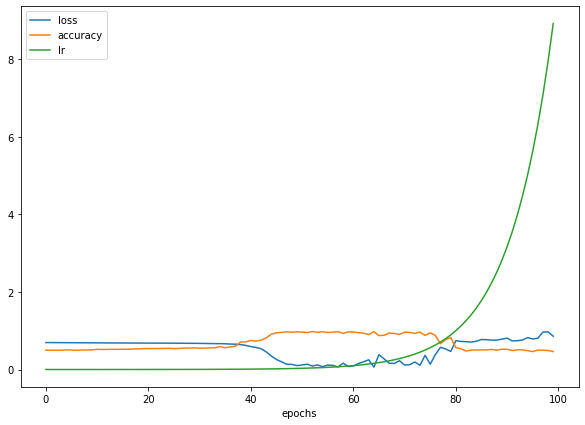

In [45]:
# Check out history
pd.DataFrame(history_9.history).plot(figsize = (10,7),xlabel = 'epochs')

Text(0.5, 1.0, 'Learning Rate vs Loss')

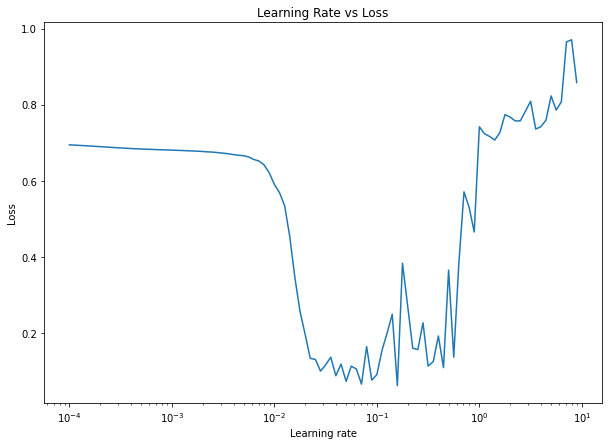

In [50]:
# Plot the lr vs loss

lrs = 1e-4 * (10**(tf.range(100)/20))
lrs
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

In [51]:
#Try using a higher (ideal) learning rate with the same model (based on the graph above)
# Set random seed
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Creating learning rate callback

history_10 = model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388

In [54]:
#Evaluate on test set

model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9950


[0.018566466867923737, 0.9950000047683716]

In [56]:
# Comparing with model 8
model_8.evaluate(X_test,y_test)
# Model 10 better loss, model 8 better accuracy -> Determine which is more important based on the problem

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849122524261, 1.0]

doing binary classification
doing binary classification


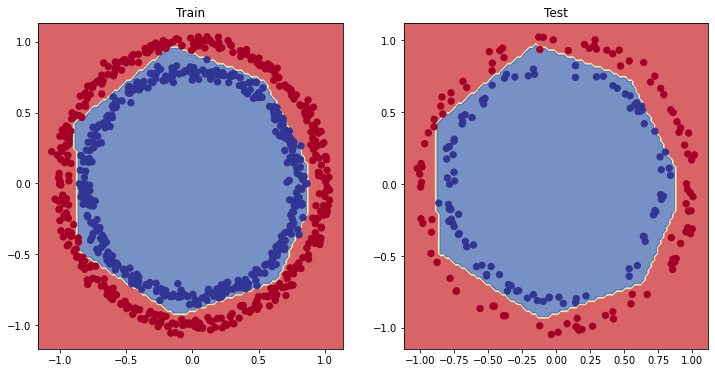

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X= X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X= X_test,y=y_test)
plt.show()